In [100]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import itertools

from sklearn.decomposition import PCA

In [92]:
def findClosestCentroids(X, centroids):
    """returns the closest centroids
    in idx for a dataset X where each row is a single example. idx = m x 1
    vector of centroid assignments (i.e. each entry in range [1..K])
    """

# You need to return the following variables correctly.
    idx = np.zeros(X.shape[0])
    
# ====================== YOUR CODE HERE ======================
# Instructions: Go over every example, find its closest centroid, and store
#               the index inside idx at the appropriate location.
#               Concretely, idx(i) should contain the index of the centroid
#               closest to example i. Hence, it should be a value in the 
#               range 1..K
#
# Note: You can use a for-loop over the examples to compute this.
    for i, xval in enumerate(X):
        dist = []
        for cent in centroids:
            dist.append(np.linalg.norm(xval - cent))
        idx[i] = np.array(dist).argmin()
# =============================================================

    return idx.astype('int')

In [93]:
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[0:3].tolist())
print('(the closest centroids should be 0, 2, 1 respectively)')


Closest centroids for the first 3 examples:
[0, 2, 1]
(the closest centroids should be 0, 2, 1 respectively)


In [38]:
def computeCentroids(X, idx, K):
    """returns the new centroids by
    computing the means of the data points assigned to each centroid. It is
    given a dataset X where each row is a single data point, a vector
    idx of centroid assignments (i.e. each entry in range [1..K]) for each
    example, and K, the number of centroids. You should return a matrix
    centroids, where each row of centroids is the mean of the data points
    assigned to it.
    """

# Useful variables
    m, n = X.shape

# You need to return the following variables correctly.
    centroids = []


# ====================== YOUR CODE HERE ======================
# Instructions: Go over every centroid and compute mean of all points that
#               belong to it. Concretely, the row vector centroids(i, :)
#               should contain the mean of the data points assigned to
#               centroid i.
#
# Note: You can use a for-loop over the centroids to compute this.
# 
    df = pd.DataFrame(X)
    df['centroid'] = idx
    for centroid in sorted(df.centroid.unique()):
        cent_df = df[df.centroid == centroid]
        means = []
        for col in df.iloc[:, 0:-1]:
            means.append(cent_df[col].mean())
        centroids.append(means)
#     df = pd.DataFrame(X, columns=['x', 'y'])
#     df['centroid'] = idx
#     for centroid in sorted(df.centroid.unique()):
#         cent_df = df[df.centroid == centroid]
#         centroids.append([cent_df.x.mean(), cent_df.y.mean()])

# =============================================================

    return centroids

In [39]:
print('Computing centroids means.')

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
for c in centroids:
    print(c)

print('(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Computing centroids means.
Centroids computed after initial finding of closest centroids:
[2.4283011120981963, 3.1579241766035673]
[5.813503308520713, 2.6336564514030254]
[7.1193868715087545, 3.6166843987216186]
(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


In [12]:
def plotDataPoints(X, idx):

    """plots data points in X, coloring them so that those
    with the same index assignments in idx have the same color
    """
    pass
    # Create palette
    # palette = hsv(K + 1)
    # colors = palette(idx, :)
    #
    # # Plot the data

    # c = dict(enumerate(np.eye(3)))
    # colors=idx
    map = plt.get_cmap("jet")
    idxn = idx.astype('float')/max(idx.astype('float'))
    colors = map(idxn)
    plt.scatter(X[:, 0], X[:, 1], 15, edgecolors=colors, marker='o', facecolors='none', lw=0.5)

def plotProgresskMeans(X, centroids, previous, idx, K, i, color):
    """plots the data
    points with colors assigned to each centroid. With the previous
    centroids, it also plots a line between the previous locations and
    current locations of the centroids.
    """

# Plot the examples
    plotDataPoints(X, idx)

# Plot the centroids as black x's
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=60, lw=3, edgecolor='k')

# Plot the history of the centroids with lines
    for j in range(len(centroids)):
        plt.plot([centroids[j,0], previous[j,0]],
                 [centroids[j,1], previous[j,1]], c=color)

# Title
    plt.title('Iteration number %d' % i)
    plt.show()

def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    """runs the K-Means algorithm on data matrix X, where each
    row of X is a single example. It uses initial_centroids used as the
    initial centroids. max_iters specifies the total number of interactions
    of K-Means to execute. plot_progress is a true/false flag that
    indicates if the function should also plot its progress as the
    learning happens. This is set to false by default. runkMeans returns
    centroids, a Kxn matrix of the computed centroids and idx, a m x 1
    vector of centroid assignments (i.e. each entry in range [1..K])
    """

# Plot the data if we are plotting progress
    if plot_progress:
        plt.figure()

# Initialize values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    c = itertools.cycle('012')
    rgb = np.eye(3)
# Run K-Means
    for i in range(max_iters):
    
        # Output progress
        print('K-Means iteration %d/%d...' % (i, max_iters))

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
    
        # Optionally, plot progress here
        if plot_progress:
            color = rgb[int(next(c))]
            plotProgresskMeans(X, np.array(centroids),
                               np.array(previous_centroids), idx, K, i, color)
            previous_centroids = centroids
            # raw_input("Press Enter to continue...")

    # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

# Hold off if we are plotting progress
    if plot_progress:
        pass
    # hold off
    return centroids, idx


Running K-Means clustering on example dataset.
K-Means iteration 0/10...


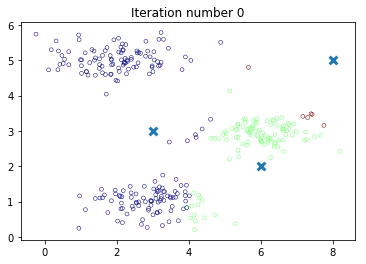

K-Means iteration 1/10...


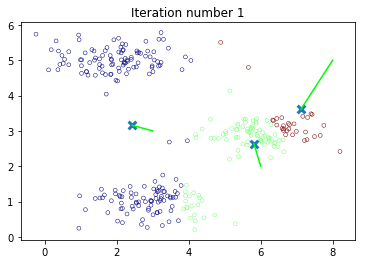

K-Means iteration 2/10...


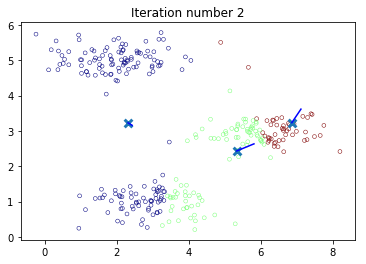

K-Means iteration 3/10...


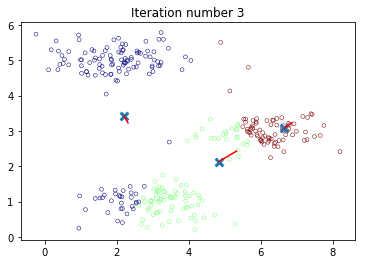

K-Means iteration 4/10...


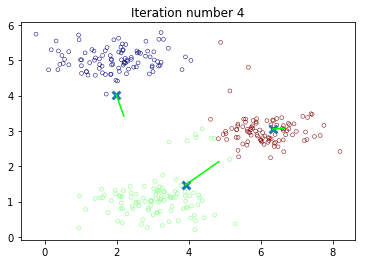

K-Means iteration 5/10...


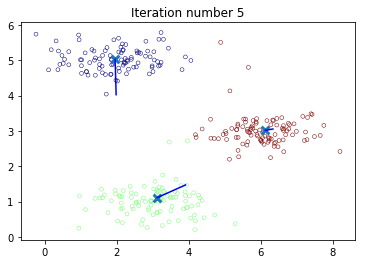

K-Means iteration 6/10...


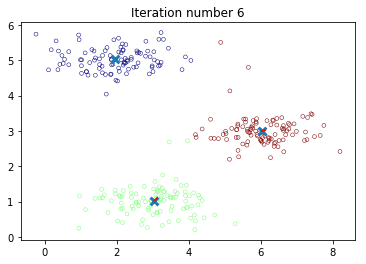

K-Means iteration 7/10...


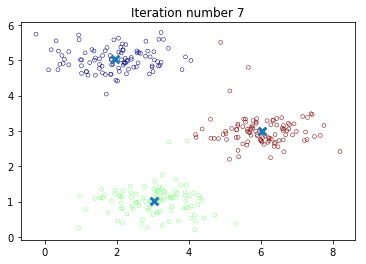

K-Means iteration 8/10...


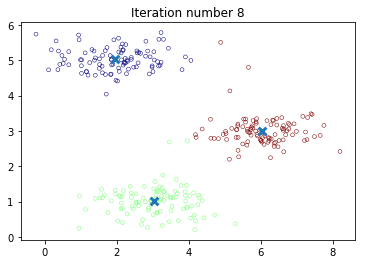

K-Means iteration 9/10...


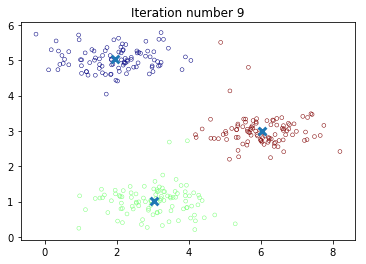

K-Means Done.


In [13]:
print('Running K-Means clustering on example dataset.')

# Load an example dataset
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = [[3, 3], [6, 2], [8, 5]]

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('K-Means Done.')

In [20]:
import random 

def get_random_index_of_ndarray(array):
    return random.randint(0, array.shape[0]-1), \
           random.randint(0, array.shape[1] - 1)

def kMeansInitCentroids(X, K):
    """returns K initial centroids to be
    used with the K-Means on the dataset X
    """

# You should return this values correctly
    centroids = np.zeros((K, X.shape[1]))

# ====================== YOUR CODE HERE ======================
# Instructions: You should set centroids to randomly chosen examples from
#               the dataset X
#
    for i in range(0, K):
        centroids[i] = X[get_random_index_of_ndarray(X)]

# =============================================================
    return centroids

array([[ 2.61867975,  2.61867975],
       [ 3.62202931,  3.62202931],
       [ 4.30471138,  4.30471138],
       [ 3.94159139,  3.94159139],
       [ 0.7920479 ,  0.7920479 ],
       [ 0.7920479 ,  0.7920479 ],
       [ 1.33285459,  1.33285459],
       [ 3.45186351,  3.45186351],
       [ 3.31058167,  3.31058167],
       [ 0.61720733,  0.61720733],
       [ 2.85475655,  2.85475655],
       [ 2.17777173,  2.17777173],
       [ 3.01502301,  3.01502301],
       [ 2.72731907,  2.72731907],
       [ 3.03084301,  3.03084301],
       [ 3.24766016,  3.24766016]])

Running K-Means clustering on pixels from an image.
K-Means iteration 0/10...


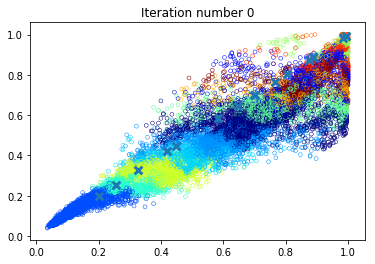

K-Means iteration 1/10...


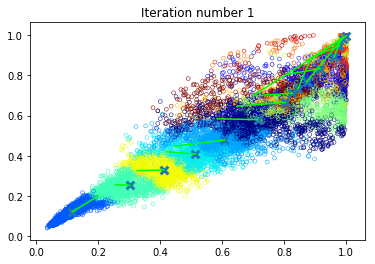

K-Means iteration 2/10...


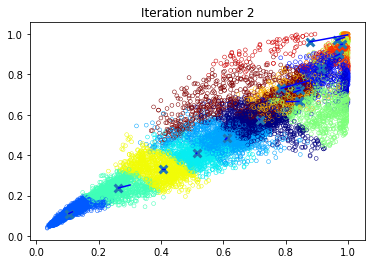

K-Means iteration 3/10...


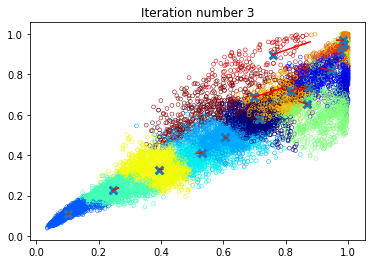

K-Means iteration 4/10...


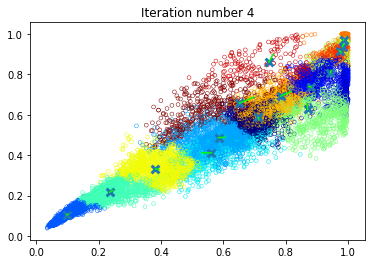

K-Means iteration 5/10...


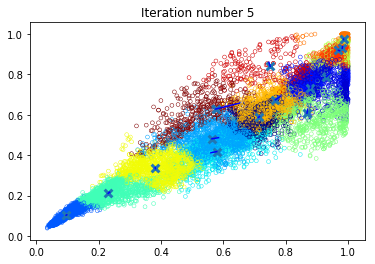

K-Means iteration 6/10...


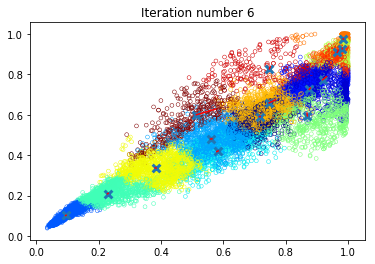

K-Means iteration 7/10...


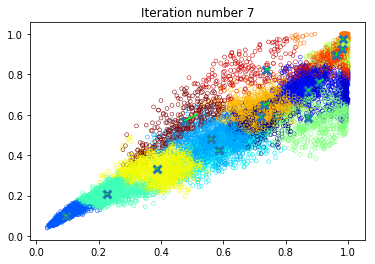

K-Means iteration 8/10...


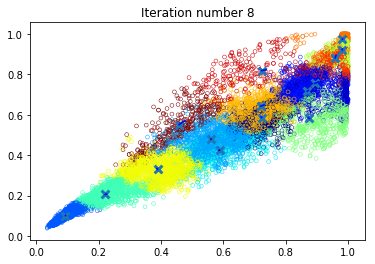

K-Means iteration 9/10...


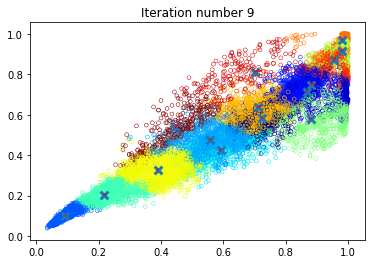

K-Means Done.


In [94]:
print('Running K-Means clustering on pixels from an image.')

#  Load an image of a bird
A = scipy.misc.imread('bird_small.png')

# If imread does not work for you, you can try instead
#   load ('bird_small.mat')

A = A / 255.0 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(img_size[0] * img_size[1], 3)

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16 
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, plot_progress=True)
print('K-Means Done.')

Applying K-Means to compress an image.
K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...


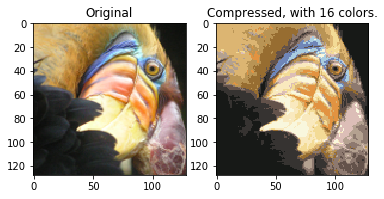

In [95]:
print('Applying K-Means to compress an image.')

centroids, idx = runkMeans(X, initial_centroids, max_iters)

# Find closest cluster members
idx = findClosestCentroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = np.array([centroids[e] for e in idx])

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

# Display the original image 
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.' % K)

# Principal Component Analysis

Visualizing example dataset for PCA.


[0.5, 6.5, 2, 8]

(0.9338233129400646,
 6.1577083383074109,
 2.6392923669912101,
 7.6025983504592629)

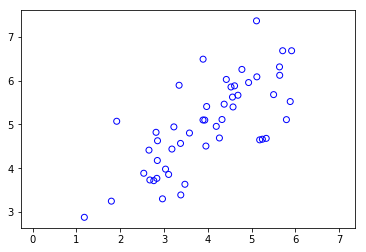

In [96]:
print('Visualizing example dataset for PCA.')
#  The following command loads the dataset. You should now have the 
#  variable X in your environment
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']

#  Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([0.5, 6.5, 2, 8])
plt.axis('equal')

In [249]:
from numpy.linalg import svd

def featureNormalize(X):
    """
    returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm / sigma

    return X_norm, mu, sigma

def pca(X):
    """computes eigenvectors of the covariance matrix of X
      Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    """

    # You need to return the following variables correctly.

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should first compute the covariance matrix. Then, you
    #               should use the "svd" function to compute the eigenvectors
    #               and eigenvalues of the covariance matrix.
    #
    # Note: When computing the covariance matrix, remember to divide by m (the
    #       number of examples).
    #
    m, n = X.shape
    cov_mat = np.dot(X.T, X) / m
    U, S, V = svd(cov_mat, compute_uv=True)
    return U, np.diag(S), V 
# =========================================================================


Running PCA on example dataset.


[0.5, 6.5, 2, 8]

(0.9338233129400646,
 6.1577083383074109,
 2.6392923669912101,
 7.6025983504592629)

Top eigenvector: 
 U(:,1) = %f %f  -0.707106781187 -0.707106781187
(you should expect to see -0.707107 -0.707107)


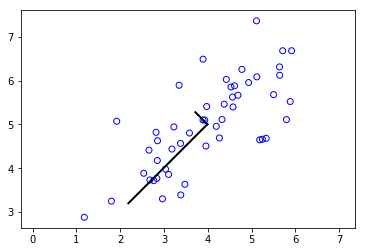

In [251]:
print('Running PCA on example dataset.')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S, V = pca(X_norm)

plt.scatter(X[:, 0], X[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([0.5, 6.5, 2, 8])
plt.axis('equal')

#  Compute mu, the mean of the each feature
mu2 = mu + 1.5 * S.dot(U)
#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.plot([mu[0], mu2[0, 0]], [mu[1], mu2[0, 1]], '-k', lw=2)
plt.plot([mu[0], mu2[1, 0]], [mu[1], mu2[1, 1]], '-k', lw=2)

print('Top eigenvector: ')
print(' U(:,1) = %f %f ', U[0, 0], U[1, 0])
print('(you should expect to see -0.707107 -0.707107)')

In [278]:
def projectData(X, U, K):
    """computes the projection of
    the normalized inputs X into the reduced dimensional space spanned by
    the first K columns of U. It returns the projected examples in Z.
    """
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the projection of the data using only the top K
    #               eigenvectors in U (first K columns).
    #               For the i-th example X(i,:), the projection on to the k-th
    #               eigenvector is given as follows:
    #                    x = X(i, :)'
    #                    projection_k = x' * U(:, k)
    #
    # =============================================================
    U_reduce = U[:,:K]
    Z = np.dot(X, U_reduce)
    return Z

def recoverData(Z, U, K):
    """
    recovers an approximation the
    original data that has been reduced to K dimensions. It returns the
    approximate reconstruction in X_rec.
    """
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the approximation of the data by projecting back
    #               onto the original space using the top K eigenvectors in U.
    #
    #               For the i-th example Z(i,:), the (approximate)
    #               recovered data for dimension j is given as follows:
    #                    v = Z(i, :)'
    #                    recovered_j = v' * U(j, 1:K)'
    #
    #               Notice that U(j, 1:K) is a row vector.
    #
    # =============================================================
    X_rec = np.dot(Z, U[:, 0:K].T)
    return X_rec

Dimension reduction on example dataset.


[-4, 3, -4, 3]

(-2.6061530879333348,
 1.8500054588116086,
 -2.3098014136801828,
 2.5406761655406687)

Projection of the first example: %f [ 1.48127391]
(this value should be about 1.481274)
Approximation of the first example: -1.047419 -1.047419
(this value should be about  -1.047419 -1.047419)


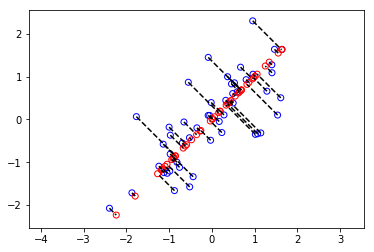

In [282]:
print('Dimension reduction on example dataset.')

#  Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([-4, 3, -4, 3]) #axis square
plt.axis('equal')

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f', Z[0])
print('(this value should be about 1.481274)')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: %f %f' % (X_rec[0, 0], X_rec[0, 1]))
print('(this value should be about  -1.047419 -1.047419)')

#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='o', color='r', facecolor='none', lw=1.0)
for i in range(len(X_norm)):
    plt.plot([X_norm[i, 0], X_rec[i, 0]], [X_norm[i, 1], X_rec[i, 1]], '--k')


In [333]:
def displayData(X):
    """displays 2D data
      stored in X in a nice grid. It returns the figure handle h and the
      displayed array if requested."""

# Compute rows, cols
    m, n = X.shape
    example_width = int(round(np.sqrt(n)))
    example_height = int(n / example_width)

# Compute number of items to display
    display_rows = np.floor(np.sqrt(m))
    display_cols = np.ceil(m / display_rows)

# Between images padding
    pad = 1
    h = (int(pad + display_rows * (example_height + pad)))
    w = (int(pad + display_cols * (example_width + pad)))
# Setup blank display
    display_array = - np.ones([h, w])

# Copy each example into a patch on the display array
    curr_ex = 0
    for j in np.arange(display_rows):
        for i in np.arange(display_cols):
            if curr_ex > m:
                break
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, : ]))
            rows = np.array([pad + j * (example_height + pad) + x for x in np.arange(example_height+1)]).astype('int')
            cols = np.array([pad + i * (example_width + pad)  + x for x in np.arange(example_width+1)]).astype('int')
            display_array[min(rows):max(rows), min(cols):max(cols)]
            display_array[min(rows):max(rows), min(cols):max(cols)] = X[curr_ex, :].reshape(example_height, example_width) / max_val
            curr_ex = curr_ex + 1
        if curr_ex > m:
            break

# Display Image
    display_array = display_array.astype('float32')
    plt.imshow(display_array.T)
    plt.set_cmap('gray')
# Do not show axis
    plt.axis('off')
#     show()


Loading face dataset.


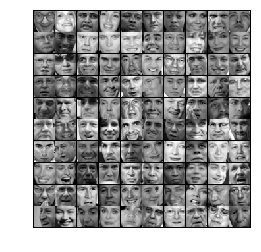

In [349]:
print('Loading face dataset.')

#  Load Face dataset
data = scipy.io.loadmat('ex7faces.mat')
X = data['X']

#  Display the first 100 faces in the dataset
displayData(X[0:100, :])

Running PCA on face dataset.
(this might take a minute or two ...)




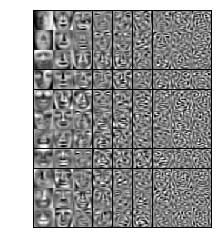

In [351]:
print('Running PCA on face dataset.\n(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S, V = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, 1:100].T)


In [352]:
print('Dimension reduction for face dataset.')

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print('%d %d' % Z.shape)


Dimension reduction for face dataset.
The projected data Z has a size of: 
5000 100


Visualizing the projected (reduced dimension) faces.


(-0.5, 330.5, 330.5, -0.5)

(-0.5, 330.5, 330.5, -0.5)

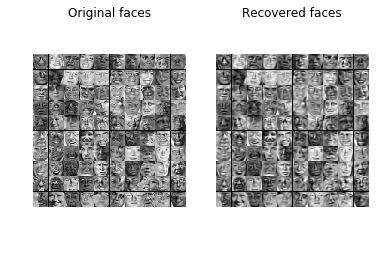

In [353]:
print('Visualizing the projected (reduced dimension) faces.')

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
plt.subplot(1, 2, 1)
displayData(X_norm[:100,:])
plt.title('Original faces')
plt.axis('equal')

# Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2)
displayData(X_rec[:100,:])
plt.title('Recovered faces')
plt.axis('equal')
# show()
# input('Program paused. Press Enter to continue...')  

In [354]:
A = scipy.misc.imread('bird_small.png')

# If imread does not work for you, you can try instead
#   load ('bird_small.mat')

A = A / 255.0
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)
K = 16 
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.floor(np.random.random(1000) * len(X)) + 1

#  Setup Color Palette

K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...


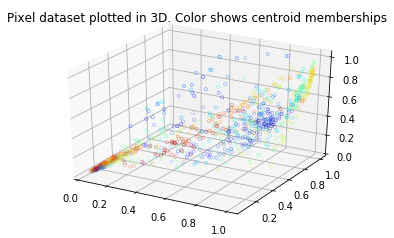

In [355]:
from mpl_toolkits.mplot3d import Axes3D

#  Visualize the data and centroid memberships in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sel = np.array(sel).astype('int')
Xs = np.array([X[s] for s in sel])
xs = Xs[:, 0]
ys = Xs[:, 1]
zs = Xs[:, 2]
cmap = plt.get_cmap("jet")
idxn = sel.astype('float')/max(sel.astype('float'))
colors = cmap(idxn)
# ax = Axes3D(fig)
ax.scatter3D(xs, ys, zs=zs, edgecolors=colors, marker='o', facecolors='none', lw=0.4, s=10)

plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')

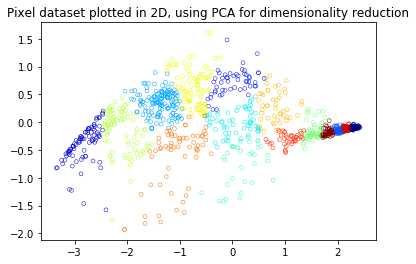

In [358]:
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S, V = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plt.figure()
zs = np.array([Z[s] for s in sel])
idxs = np.array([idx[s] for s in sel])

# plt.scatter(zs[:,0], zs[:,1])
plotDataPoints(zs, idxs)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')